In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import pi

In [2]:
df_lables = pd.read_csv('dataset_with_clusters.csv')
lables = df_lables['Clusters']

In [3]:
df = pd.read_csv("DatasetClientClustering.csv", 
                 engine='c', 
                 sep=',', 
                 encoding='latin-1')
df = df.drop(df.columns[list(np.arange(8))], axis=1)

In [4]:
df['Clusters'] = lables
df

,ClientID,RiskPropension,PortfolioRisk,ClientInvestmentHorizon,PortfolioHorizon,ClientKnowledgeExperience,ClientPotentialIndex,IncomeHighLow,Sex,AuM,...,PanicMood,ClientDateStart,NoTrustInBanks,Prov,BondInvestments,EquityInvestments,MoneyMarketInvestments,OtherInvestments,Cash,Clusters
0,Client1,0.597553,0.087787,20.778831,3.7027,0.285714,0.148466,0,1,13719,...,0,2015,0,PA,0.5730,0.4270,0.0000,0.0000,0.0000,0
1,Client2,0.501486,0.062290,15.228477,2.7327,0.714286,0.152761,0,1,45973,...,0,2016,0,RM,0.5341,0.4466,0.0124,0.0000,0.0070,0
2,Client3,0.554108,0.000000,9.675789,0.5000,0.523810,0.243558,0,0,10233,...,0,2015,0,BS,0.0000,0.0000,0.0000,0.0000,1.0000,2
3,Client4,0.440729,0.032341,9.563829,2.5676,0.619048,0.089571,0,0,25144,...,0,2015,0,RE,0.6428,0.1220,0.0407,0.1943,0.0002,0
4,Client5,0.540528,0.037852,17.941533,2.4911,0.428571,0.162577,0,0,222892,...,0,2015,0,MI,0.1707,0.2701,0.5332,0.0045,0.0215,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Client4996,0.417480,0.061442,39.616461,3.4684,0.619048,0.174847,0,0,26348,...,0,2006,0,CO,0.3792,0.4520,0.0671,0.0830,0.0187,0
4996,Client4997,0.594193,0.023741,12.897960,1.0325,0.809524,0.292025,0,1,1002570,...,0,2016,1,FI,0.9012,0.0283,0.0197,0.0495,0.0012,-1
4997,Client4998,0.577775,0.000000,15.481864,0.5000,0.523810,0.096933,0,1,31032,...,0,2016,0,PU,0.0000,0.0000,0.0000,0.0000,1.0000,3
4998,Client4999,0.402162,0.014505,7.220000,1.7193,0.523810,0.142945,0,0,50243,...,0,2015,0,SA,0.6541,0.1626,0.1635,0.0000,0.0198,0


In [5]:
mean = df.groupby('Clusters').mean().drop([-1])

mean[['Age', 'Sex', 'IncomeNeed', 'ClientInvestmentHorizon', 'PortfolioHorizon', 'ProtectionNeed', 'RiskPropension', 'PortfolioRisk', 'AuM',
      'Cash', 'MoneyMarketInvestments', 'BondInvestments', 'EquityInvestments', 'InheritanceIndex', 'IncomeHighLow', 'PanicMood']].sort_values(by = 'Age')

,Age,Sex,IncomeNeed,ClientInvestmentHorizon,PortfolioHorizon,ProtectionNeed,RiskPropension,PortfolioRisk,AuM,Cash,MoneyMarketInvestments,BondInvestments,EquityInvestments,InheritanceIndex,IncomeHighLow,PanicMood
Clusters,,,,,,,,,,,,,,,,
2,28.896842,0.515789,0.135193,16.228947,1.276364,0.706034,0.668354,0.025595,37246.012632,0.423281,0.030623,0.416508,0.116311,0.128081,0.008421,-0.006316
3,45.250608,0.506083,0.223256,14.251061,1.393857,0.708604,0.592737,0.028628,66410.856448,0.225425,0.048772,0.577476,0.124999,0.460597,0.012165,-0.021898
0,58.699206,0.496691,0.302256,12.036905,2.707849,0.261559,0.442095,0.054350,79271.127399,0.136139,0.050086,0.484583,0.270678,0.509605,0.078425,0.000000
1,66.058632,0.534202,0.714394,10.518866,2.549750,0.268849,0.426926,0.056610,796795.483713,0.072660,0.047265,0.563372,0.261653,0.674115,0.136808,0.000000


## Descrizione variabili personali per cluster
### Quelle che abbiamo usato per clusterizzare + quelle più clusterizzanti per l'entropia

4 cluster molto omogenei nel sesso:
1) Giovani: 28/29 anni 
2) Adulti giovani: 44/46 anni 
3) Adulti maturi: 58/59 anni
4) Maturi: 65/67 anni

Si osserva subito che i giovani hanno **income need** più basso, mediamente 0.13 (indice del bisogno di reddito - cedole e dividendi --> ritorno sugli investimenti). Al crescere dell'età cresce in modo omogeneo (c.a. +9 pp) eccetto per il cluster dei maturi dove il valore di income need distacca nettamente quello degli altri cluster (in media 0.7, c.a. +40 pp dal cluster degli adulti maturi e +60 pp da quello dei giovani).

I valori di income need sono in parte spiegati dall'andamento di **protection need**, infatti si osserva una netta distinzione tra i due cluster più giovani (che hanno valore medio pari a 0.7) e i due più maturi (in media 0.26). Un alto valore di protection need significa che i clienti preferiscono investire su prodotti che siano in grado di limitare la perdita di patrimonio in un arco di tempo (ad esempio fondi comuni, certificazioni, polize, obbligazioni strutturate), si tratta di obiettivi di lungo periodo. Questo tipo di prodotti sono utili per convincere i risparmiatori italiani ad investire la loro preziosa liquidità (fonte Consob). Ovviamente un investimento su prodotti di questo tipo porta ad income need più bassi in quanto meno rischiosi.

Di conseguenza si osserva che, nei cluster con protection need più alta hanno anche valori di **client investment horizon** più alti (anche se distributi più omogeneamente rispetto a protection need): i due gruppi più giovani prediligono investimenti di lungo periodo (16 anni per i giovani e 14 gli adulti giovani) mentre i due più maturi hanno investimenti più brevi (12 per gli adulti maturi e 10 anni per i maturi). Con orizzonte di investimento si intende il periodo di tempo nel quale si è disposti a rinunciare alla propria liquidità per investirla: quando è di breve periodo si ha una maggior conservazione del capitale mentre, quando è di lungo periodo si può incorrere in maggiori rischi e maggiori guadagni (se la propensione al rischio lo consente) (fonte Consob).

Si vede infatti che la **risk propension** nei giovani è più alta e diminuisce al crescere dell'età (si osserva che i due gruppi più maturi hanno valori molto simili tra loro, non significativamente diversi). Con risk propension si indica la dispobibilità a sopportare perdite patrimoniali dovute all'andamento negativo del mercato: più è alto più siamo disposti ad accettare che l'investimento non consegua i risultati sperati (fonte Consob).

Ovviamente, per quanto riguarda **inheritance index** (indice del bisogno di ottimizzazione successoria/fiscale) cresce al crescere dell'età: quasi indifferente nei giovani (mediamente 0.12) e praticamente indispensabile nei maturi (0.67).

Per quanto riguarda **income high low** (0 = basso, 1 = alto). Sappiamo che ha una distribuzione particolare, dove praticamente tutti hanno valore 0 e qualcuno ha valore 1. I giovani hanno ovviamente reddito dichiarato bassissimo (0.008, ampia variazione tra 0.0002 e 0.016) seguito dal cluser degli adulti più giovani (con valori non significativamente diversi) e distaccati dai due cluster più maturi (anche se si resta sempre sotto lo 0.15). Il cluster più maturo è quello con reddito dichiarato più alto.

Per **panic mood** (tendenza ad andare nel panico) anche lei ha una distribuzione molto disomogenea: assume solo valori -1 e 0, sono tutti praticamente 0. Si osserva però che i -1, quelli che vanno nel panico, si trovano nei cluster più giovani (soprattuto quello degli adulti giovani). I cluster più maturi hanno valore medio pari a 0 quindi non contengono affatto persone che vanno nel panico.

## Considerazioni finali riguardo alle variabili personali
I giovani, penalizzati probabilmente dal reddito più basso, preferiscono investimenti di lungo periodo e protetti, con ritorni sugli investimenti più bassi. Probabilemente anche la loro preferenza ad investire su prodotti più sicuri gli permette di avere una risk propension più alta in quanto sono più capaci di sopportare i rischi derivanti dagli investimenti. 

I gruppi più maturi invece hanno maggior dimestichezza negli investimenti, riescono ad ottenere ritorni maggiori, il reddito più alto probabilmente gli permette di rinunciare a prodotti più sicuri e rischiare di più. Però il fatti di investire molto e in modo anche più rischioso probabilmente è il motivo per cui la loro risk propension è più bassa: se qualcosa andasse storto hanno più probabilità di restare in braghe di tela rispetto ai gruppi più giovani.

Sicuramente i giovani possono contare su investimenti più a lungo termine che, senza panico, in futuro porteranno a dei guadagni.

## Analisi dei portafogli tipo di ogni cluster

La prima cosa che salta all'occhio è la profonda differenza tra il capitale investito (**AuM**) dai primi tre cluster e quello dei maturi: i più giovani investono mediamente €37k, c.a. +80% nel cluster degli adulti giovani (€66k), raggiunge €79k negli adulti maturi ed esplode nei maturi arrivando ad una media di €797k (!!!).

Al crescere dell'età (e del patrimonio investibile) diminuisce la tendenza ad investire in **cash** (investimento più sicuro) ed aumenta quella ad investire in **equity investments** (azioni, le meno sicure). 

Per quanto riguarda **money market investments** (investimenti in strumenti monetari, prodotti che vengono utilizzati per scadenze brevi. In generale, rispetto agli strumenti finanziari, offrono un basso rendimento e un basso rischio. Sono i preferiti dagli investitori che necessitano di soddisfare esigenze e obiettivi imminenti, solitamente entro l'anno - fonte solofinanza.it) si nota che sono i prodotti meno preferiti. L'unico cluster con valori significativamente diversi è quello dei giovani con il capitale investito più basso e investimenti in strumenti monetari più basso. Gli adulti più giovani invece sono il cluster con la maggior variabilità (sono anche quelli con la maggior variabilità di AuM).

I **bond investments** (investimenti in obbligazioni che sono titoli di debito emessi da una società o da un ente pubblico per finanziarsi che, nelle mani di un investitore, costituiscono titoli di credito che attribuiscono il diritto di percepire, secondo modalità prefissate, gli interessi e a scadenza il rimborso del capitale nominale. Le obbligazioni possono essere emesse da diversi soggetti: imprese, organizzazioni internazionali, Stati sovrani e altre pubbliche amministrazioni - fonte library.weschool.com) sono il tipo di investimento preferito da tutti, solo per il cluster più giovane e con meno capitale sono ugualmente preferiti. Non hanno valori significativamente diversi il gruppo degli adulti giovani e quello dei maturi.

In conclusione si ha che il **portfolio risk** è più basso nei cluster più giovani e con capitale più basso, con valori non significativamente diversi, mentre è più alto nei cluster più maturi anche in questo caso con valori non significativamente diversi anche se il loro capitale investito è nettamente diverso (i maturi investono €+700K rispetto agli adulti maturi).

**Portfolio horizon** (orizzonte d'investimento implicito nel o ideale del portafoglio del cliente) ha la stessa distribuzione di portfolio risk: nei cluster dove portfolio risk è più basso portfolio horizon è più basso in quanto ad investimenti meno rischiosi corrispondono orizzonti temporali più brevi (cluster più giovani con valori non significativamente diversi); per quanto riguarda i cluster più adulti hanno orizzonte temporale del portafoglio più lungo (a prevalere è quello degli adulti maturi). 

## Considerazioni finali riguardo ai cluster, alle loro caratteristiche e ai loro comportamenti 
##### con spolverata di suggerimenti tra le righe ma non me la sento di fare affermazioni troppo forti in quanto specialista di mifid2 della domenica

In generale si è osservato che i giovani hanno meno capitale investito, dovuto probabilmente anche al fatto che hanno un reddito dichiarato basso rispetto agli altri. Tendono ad investire maggiormente in cash e questo dato è in linea con la loro ricerca di strumenti finanziari sicuri (e la tendenza ad andare nel panico). 
Al crescere dell'età aumenta il capitale investito (concorde con l'aumento del reddito), cresce probabilmente anche la sicurezza e la propria capacità in quanto si rinuncia gradualmente agli investimenti più protetti come quelli in cash e ci si sposta sempre più verso le azioni, preferendo comunque sempre i bond/obbligazioni.

Si nota che, in tutti i cluster, i valori di client investment horizon e risk propension sono discordi rispettivamente con portfolio horizon e portfolio risk: i cluster con alto clienti investment horizon (quindi una capacità di investire a lungo termine) sono quelli che poi fanno investimenti più a breve termine, probabilemente viziati dalla necessità di investimenti sicuri, che lasciano tutto in cash e alla fine non hanno chissà che ritorni (basso income need). Questi potrebbero spostarsi un po' di più verso investimenti in money market; i cluster con risk propension più alta hanno poi portfolio risk più basso, ma penso che, data la definizione di risk propension, sia proprio dovuto al fatto che un portafoglio a basso rischio lascia tutto in cash e quindi si ha poi una miglior capacità a sopprotare i rischi finanziari perchè c'è più liquidità.

In ogni caso i giovani hanno poco da investire e i maturi hanno decisamente di più, è giusto che i maturi investano più in azioni e obbligazioni, che facciano investimenti a lungo termine e che sistemino tutto per i posteri. Un investimento a lungo termine è più rischioso, ma porta un ritorno maggiore (alto income need) e da bravo risparmiatore italiano ultra 65enne, fai la formichina e metti via tutto per i tuoi figli sperando di arricchirli grazie ai tuoi investimenti e non ti godi la pensione dopo una vita passata a sgobbare (piccolo parere personale conclusivo).

In [6]:
LB = mean - (1.96 * df.groupby('Clusters').std() / np.sqrt(df.groupby('Clusters').count())).drop([-1])

LB[['Age', 'Sex', 'IncomeNeed', 'ClientInvestmentHorizon', 'PortfolioHorizon', 'ProtectionNeed', 'RiskPropension', 'PortfolioRisk', 'AuM',
      'Cash', 'MoneyMarketInvestments', 'BondInvestments', 'EquityInvestments', 'InheritanceIndex', 'IncomeHighLow', 'PanicMood']].sort_values(by = 'Age')

,Age,Sex,IncomeNeed,ClientInvestmentHorizon,PortfolioHorizon,ProtectionNeed,RiskPropension,PortfolioRisk,AuM,Cash,MoneyMarketInvestments,BondInvestments,EquityInvestments,InheritanceIndex,IncomeHighLow,PanicMood
Clusters,,,,,,,,,,,,,,,,
2,28.195845,0.470799,0.131267,15.486876,1.205754,0.702263,0.662161,0.023820,33950.736360,0.386746,0.024597,0.386538,0.105422,0.123121,0.000195,-0.013448
3,44.596789,0.457688,0.219065,13.602582,1.321423,0.704813,0.587984,0.027071,61006.079454,0.194710,0.037383,0.549680,0.114415,0.454920,0.001554,-0.036064
0,58.142796,0.478861,0.299186,11.750084,2.633630,0.258181,0.438243,0.052387,76787.637502,0.126493,0.046532,0.475103,0.263091,0.503768,0.068838,0.000000
1,65.066056,0.494713,0.703255,9.874491,2.452010,0.262528,0.421290,0.054210,710541.150070,0.059144,0.043237,0.548003,0.248724,0.663510,0.109604,0.000000


In [7]:
UB = mean + (1.96 * df.groupby('Clusters').std() / np.sqrt(df.groupby('Clusters').count())).drop([-1])

UB[['Age', 'Sex', 'IncomeNeed', 'ClientInvestmentHorizon', 'PortfolioHorizon', 'ProtectionNeed', 'RiskPropension', 'PortfolioRisk', 'AuM',
      'Cash', 'MoneyMarketInvestments', 'BondInvestments', 'EquityInvestments', 'InheritanceIndex', 'IncomeHighLow', 'PanicMood']].sort_values(by = 'Age')

,Age,Sex,IncomeNeed,ClientInvestmentHorizon,PortfolioHorizon,ProtectionNeed,RiskPropension,PortfolioRisk,AuM,Cash,MoneyMarketInvestments,BondInvestments,EquityInvestments,InheritanceIndex,IncomeHighLow,PanicMood
Clusters,,,,,,,,,,,,,,,,
2,29.597839,0.560780,0.139119,16.971018,1.346974,0.709805,0.674546,0.027370,40541.288903,0.459816,0.036648,0.446478,0.127200,0.133042,0.016648,0.000816
3,45.904427,0.554478,0.227447,14.899540,1.466291,0.712395,0.597490,0.030185,71815.633441,0.256141,0.060161,0.605273,0.135583,0.466274,0.022777,-0.007732
0,59.255616,0.514521,0.305326,12.323726,2.782069,0.264937,0.445947,0.056313,81754.617296,0.145785,0.053639,0.494063,0.278264,0.515442,0.088012,0.000000
1,67.051207,0.573691,0.725533,11.163241,2.647490,0.275170,0.432562,0.059010,883049.817357,0.086177,0.051293,0.578742,0.274582,0.684721,0.164012,0.000000


C:\Users\giuli\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017D231740C8>,
      dtype=object)

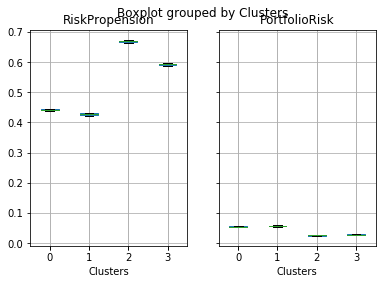

In [8]:
##Codice da usare per visualizzare gli intervalli di confidenza degli attributi di interesse

box = pd.concat([mean, LB, UB])
box.boxplot(column = ['RiskPropension', 'PortfolioRisk'], by = 'Clusters')